## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
pip install swifter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import swifter
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from tqdm import tqdm
stopwords = nltk.corpus.stopwords.words('english')


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# Opening JSON file 
f = open(r'C:\Users\S1158571\Desktop\MyDocs\Education\Data Science\MODULE4-NLP\Case Study\complaints-2021-05-14_08_16.json')
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [4]:
# Inspect the dataframe to understand the given data.
df.shape

(78313, 22)

In [5]:
df.info

<bound method DataFrame.info of                     _index      _type      _id  _score   _source.tags  \
0      complaint-public-v2  complaint  3211475     0.0           None   
1      complaint-public-v2  complaint  3229299     0.0  Servicemember   
2      complaint-public-v2  complaint  3199379     0.0           None   
3      complaint-public-v2  complaint  2673060     0.0           None   
4      complaint-public-v2  complaint  3203545     0.0           None   
...                    ...        ...      ...     ...            ...   
78308  complaint-public-v2  complaint  3105617     0.0           None   
78309  complaint-public-v2  complaint  3091984     0.0           None   
78310  complaint-public-v2  complaint  3133355     0.0           None   
78311  complaint-public-v2  complaint  3110963     0.0           None   
78312  complaint-public-v2  complaint  2001189     0.0           None   

      _source.zip_code _source.complaint_id  \
0                90301              3211475 

In [6]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [7]:
#print the column names
print("Columns are: ", df.columns.values)

Columns are:  ['_index' '_type' '_id' '_score' '_source.tags' '_source.zip_code'
 '_source.complaint_id' '_source.issue' '_source.date_received'
 '_source.state' '_source.consumer_disputed' '_source.product'
 '_source.company_response' '_source.company' '_source.submitted_via'
 '_source.date_sent_to_company' '_source.company_public_response'
 '_source.sub_product' '_source.timely' '_source.complaint_what_happened'
 '_source.sub_issue' '_source.consumer_consent_provided']


In [8]:
#Assign new column names
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)

In [9]:
#Assign nan in place of blanks in the complaints column
df['complaint_what_happened'].replace('', np.nan, inplace=True)

In [10]:
#Remove all rows where complaints column is nan
df['complaint_what_happened'].isnull().sum()
df.dropna(subset=['complaint_what_happened'],inplace=True)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [11]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
    text=text.lower()  #convert to lower case
    text=re.sub(r'^\[[\w\s]\]+$',' ',text) #Remove text in square brackets
    text=re.sub(r'[^\w\s]',' ',text) #Remove punctuation
    text=re.sub(r'^[a-zA-Z]\d+\w*$',' ',text) #Remove words with numbers
    text=re.sub(r'x+((/xx)*/\d*\s*)|x*', '',text) #Remove date
    return text

In [12]:
#Write your function to Lemmatize the texts
#stopwords = nlp.Defaults.stop_words
def lemmatization(texts):
    lemma_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)]
        lemma_sentences.append(' '.join(sent))
    return lemma_sentences

In [13]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

In [14]:
# Clean text columns
df_clean['complaint_what_happened'] = df['complaint_what_happened'].apply(lambda x: clean_text(x))

In [15]:
!pip install tqdm

In [16]:
# lemmitize the text columns
df_clean['complaint_what_happened_lemmatized'] = lemmatization(df_clean['complaint_what_happened'])

21072it [07:52, 44.60it/s]


In [17]:
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...
...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...


In [18]:
#Write your function to extract the POS tags 
def extract_pos_tags(texts):
    pos_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.text for token in doc if token.tag_ == 'NN']
        pos_sentences.append(' '.join(sent))
    return pos_sentences

df_clean["complaint_POS_removed"] = extract_pos_tags(df_clean['complaint_what_happened_lemmatized'])


21072it [03:59, 88.04it/s] 


In [19]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...
...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...,chase card customer decade solicitation credit...
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...,call visa credit card provider claim purchase ...
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...,pay risk consumer app chase year trust mobile ...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...,credit yrs chase credit card chase freedom pro...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




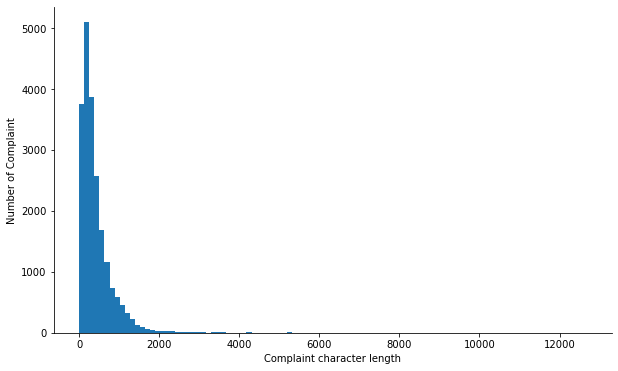

In [20]:
# Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 100)
plt.ylabel('Number of Complaint')
plt.xlabel('Complaint character length')
sns.despine();

#### Find the top 40 words by frequency among all the articles after processing the text.

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S1158571\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S1158571\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\S1158571\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S1158571\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from wordcloud import WordCloud, STOPWORDS

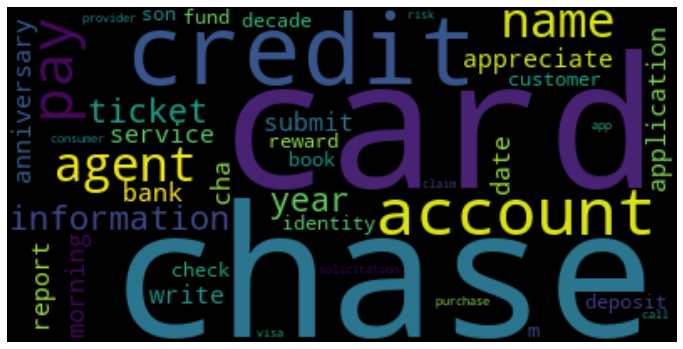

In [24]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
wordcloud = WordCloud(max_words=40, random_state=1, stopwords=set(STOPWORDS))
wordcloud.generate(str(df_clean['complaint_POS_removed']))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [26]:
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...,chase card report application submit identity ...
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...,book ticket ticket reward card information off...
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...
...,...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...,call visa credit card provider claim purchase ...,call visa credit card provider claim purchase ...
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...,pay risk consumer app chase year trust mobile ...,pay risk consumer app chase year trust mobile ...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def top_grams(grams):
    c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(grams,grams))
    grams = c_vec.fit_transform(df_clean['Complaint_clean'])
    count_values = grams.sum(axis=0)
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
    return df_ngram


In [29]:
# function to get the specified top n-grams
def get_top_n_words(corpus, n=None,count=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:count]

In [30]:
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,10)

In [31]:
unigram

[('chase', 63435),
 ('account', 45635),
 ('credit', 34026),
 ('card', 30377),
 ('bank', 22447),
 ('payment', 21365),
 ('call', 19750),
 ('time', 16307),
 ('charge', 15665),
 ('day', 13276)]

In [32]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 


In [33]:
#Print the top 10 words in the bigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 2,10)
unigram

[('credit card', 12891),
 ('call chase', 4228),
 ('credit report', 3976),
 ('chase credit', 3397),
 ('chase bank', 3275),
 ('customer service', 3048),
 ('account chase', 2748),
 ('check account', 2544),
 ('chase account', 2311),
 ('contact chase', 2150)]

In [34]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 


In [35]:
#Print the top 10 words in the trigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 3,10)
unigram

[('chase credit card', 2456),
 ('credit card account', 1072),
 ('credit card company', 981),
 ('credit card chase', 786),
 ('chase customer service', 605),
 ('inquiry credit report', 509),
 ('call customer service', 460),
 ('charge credit card', 422),
 ('credit card credit', 407),
 ('credit reporting agency', 381)]

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [36]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [37]:
#All masked texts has been removed
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...,chase card report application submit identity ...
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...,book ticket ticket reward card information off...
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...
...,...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...,call visa credit card provider claim purchase ...,call visa credit card provider claim purchase ...
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...,pay risk consumer app chase year trust mobile ...,pay risk consumer app chase year trust mobile ...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [38]:
#Write your code here to initialise the TfidfVectorizer 

tfidf = TfidfVectorizer(max_df=0.95, min_df=25, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [39]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])
dtm

<21072x1848 sparse matrix of type '<class 'numpy.float64'>'
	with 654323 stored elements in Compressed Sparse Row format>

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [40]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [41]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(random_state=40, n_components=num_topics)

In [42]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

C:\Users\S1158571\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



1848

In [43]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = nmf_model.components_[i].argsort()[::-1][:15]
    topic_words_df.iloc[i] = words[ix]

topic_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,deposit,chase,fund,branch,day,transfer,number,business,transaction,customer,claim
Topic 2,charge,card,chase,dispute,fee,transaction,purchase,merchant,claim,fraud,service,refund,time,email,contact
Topic 3,loan,mortgage,chase,home,modification,property,year,letter,document,rate,foreclosure,time,request,sale,refinance
Topic 4,credit,card,report,inquiry,chase,account,score,company,debt,information,limit,application,year,letter,reporting
Topic 5,payment,balance,month,fee,pay,statement,chase,day,time,auto,date,credit,account,year,error


In [44]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)


array([0, 1, 3, ..., 1, 4, 4], dtype=int64)

In [45]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = topic_results.argmax(axis=1)

In [46]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...,0
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...,1
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...,chase card report application submit identity ...,3
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...,book ticket ticket reward card information off...,3
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...,0


In [47]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...,0
24,mishandling of this account by chase auto and,mishandle account chase auto,mishandle account chase auto,mishandle account chase auto,0
17,with out notice j p morgan chase restricted m...,notice j p morgan chase restrict account deb...,account debit card branch customer service rep...,account debit card branch customer service rep...,0
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...,0
27,i opened an account with chase bank on and us...,open account chase bank use code bonus c...,account bank code bonus call follow term every...,account bank code bonus call follow term every...,0
32,my chase amazon card was declined for a cateri...,chase amazon card decline catering order place...,catering order place brother funeral amount co...,catering order place brother funeral amount co...,1
21,on 2019 i made a 300 00 payment to an o...,2019 make 300 00 payment online ret...,payment retailer chase pay chase website scam ...,payment retailer chase pay chase website scam ...,1
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...,1
30,to whom it may concern chase bank charged wro...,may concern chase bank charge wrongly overdr...,bank overdraft fee alert balance fee balance t...,bank overdraft fee alert balance fee balance t...,1
40,a sofa love seat table and chairs and was ...,sofa love seat table chair never delive...,sofa love seat table chair debit card charge b...,sofa love seat table chair debit card charge b...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [48]:
#Create the dictionary of Topic names and Topics
Topic_names = {0:'Credit_card_or_prepaid_card', 1:'Bank Account services', 2:'Mortgage_Loan', 3:'Others', 4:'Theft_Dispute_Reporting'}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [49]:
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...,Credit_card_or_prepaid_card
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...,Bank Account services
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...,chase card report application submit identity ...,Others
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...,book ticket ticket reward card information off...,Others
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...,Credit_card_or_prepaid_card
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Others
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...,call visa credit card provider claim purchase ...,call visa credit card provider claim purchase ...,Bank Account services
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...,pay risk consumer app chase year trust mobile ...,pay risk consumer app chase year trust mobile ...,Bank Account services
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,Theft_Dispute_Reporting


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [50]:
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is and i appreciate it ...,good morning name appreciate could help put...,morning name appreciate bank service write cha...,morning name appreciate bank service write cha...,Credit_card_or_prepaid_card
2,i upgraded my card in 2018 and was told by...,upgrade card 2018 tell agent upgrade ann...,card agent anniversary date agent information ...,card agent anniversary date agent information ...,Bank Account services
10,chase card was reported on 2019 however fr...,chase card report 2019 however fraudule...,chase card report application submit identity ...,chase card report application submit identity ...,Others
11,on 2018 while trying to book a ticket ...,2018 try book ticket come across o...,book ticket ticket reward card information off...,book ticket ticket reward card information off...,Others
14,my grand son give me check for 1600 00 i de...,grand son give check 1600 00 deposit chas...,son check deposit chase account fund account m...,son check deposit chase account fund account m...,Credit_card_or_prepaid_card
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer well decade offer multip...,chase card customer decade solicitation credit...,chase card customer decade solicitation credit...,Others
78309,on wednesday i called chas my visa cred...,wednesday call chas visa credit card...,call visa credit card provider claim purchase ...,call visa credit card provider claim purchase ...,Bank Account services
78310,i am not familiar with pay and did not unders...,familiar pay understand great risk provide c...,pay risk consumer app chase year trust mobile ...,pay risk consumer app chase year trust mobile ...,Bank Account services
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs chase credit card ...,credit yrs chase credit card chase freedom pro...,credit yrs chase credit card chase freedom pro...,Theft_Dispute_Reporting


In [51]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data= df_clean.drop(['complaint_what_happened_lemmatized', 'complaint_POS_removed', 'Complaint_clean'], axis=1)

In [52]:
training_data

,complaint_what_happened,Topic
1,good morning my name is and i appreciate it ...,Credit_card_or_prepaid_card
2,i upgraded my card in 2018 and was told by...,Bank Account services
10,chase card was reported on 2019 however fr...,Others
11,on 2018 while trying to book a ticket ...,Others
14,my grand son give me check for 1600 00 i de...,Credit_card_or_prepaid_card
...,...,...
78303,after being a chase card customer for well ove...,Others
78309,on wednesday i called chas my visa cred...,Bank Account services
78310,i am not familiar with pay and did not unders...,Bank Account services
78311,i have had flawless credit for 30 yrs i ve ha...,Theft_Dispute_Reporting


In [53]:
#Create the dictionary of Topic names and Topics
Topic_names = {'Credit_card_or_prepaid_card':0,'Bank Account services':1, 'Mortgage_Loan':2, 'Others':3,'Theft_Dispute_Reporting':4}

#Replace Topics with Topic Names
training_data['Topic'] = df_clean['Topic'].map(Topic_names)

In [54]:
training_data.count()

complaint_what_happened    21072
Topic                      21072
dtype: int64

####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaint_what_happened)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

In [58]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.3, train_size=0.7, random_state=42)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [59]:
# Write your code here to build any 3 models and evaluate them using the required metrics

# Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
predicted = lr.predict(X_test)
print(classification_report(y_true=y_test, y_pred=predicted))



              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1583
           1       0.90      0.91      0.91      1557
           2       0.92      0.93      0.93      1099
           3       0.93      0.91      0.92      1360
           4       0.95      0.86      0.90       723

    accuracy                           0.92      6322
   macro avg       0.92      0.91      0.92      6322
weighted avg       0.92      0.92      0.92      6322



C:\Users\S1158571\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [60]:
# Decision tree classifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
predicted = dt.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1583
           1       0.72      0.73      0.72      1557
           2       0.81      0.81      0.81      1099
           3       0.79      0.78      0.78      1360
           4       0.73      0.75      0.74       723

    accuracy                           0.77      6322
   macro avg       0.77      0.77      0.77      6322
weighted avg       0.77      0.77      0.77      6322



In [61]:
# Random Forest classifier

rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)
predicted = rfc.predict(X_test)

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      1583
           1       0.70      0.83      0.76      1557
           2       0.86      0.73      0.79      1099
           3       0.73      0.78      0.75      1360
           4       1.00      0.04      0.08       723

    accuracy                           0.73      6322
   macro avg       0.80      0.66      0.64      6322
weighted avg       0.77      0.73      0.70      6322



In [62]:
##Gaussian Model classifier
nb = GaussianNB().fit(X_train.toarray(), y_train)
predicted = nb.predict(X_test.toarray())

print(classification_report(y_pred=predicted, y_true=y_test))

              precision    recall  f1-score   support

           0       0.42      0.30      0.35      1583
           1       0.47      0.32      0.38      1557
           2       0.49      0.48      0.49      1099
           3       0.36      0.29      0.32      1360
           4       0.16      0.43      0.23       723

    accuracy                           0.35      6322
   macro avg       0.38      0.36      0.35      6322
weighted avg       0.40      0.35      0.36      6322



### Model Inference
#### Based on the topic modeling and supervised ML models, the Logistic Regression provides the best results followed Decision Trees and Random Forest Classifiers. The LR model can be used to classify any new complaint to it's respective topic.